In [2]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

In [84]:
#set physical constants
rsun = np.array([0,0])
rearth = np.array([149600000000,0]) #149,600,000 km from the Sun to Earth
msun = 1988500 * 10**24 #kg
mearth = 5.9724 * 10**24 #kg
T = 365.256 * 24 * 3600 #year in seconds
G = 6.6743 * 10**-11 #Nm^2/kg^2

In [150]:
#Equation that determines Lagrange Points
def LagrangeEq(r):
    #find differences in Earth, Sun, and position vectors
    sunr = rsun - r
    earthr = rearth - r
    
    #find magnitudes of those relative position vectors
    sunrmag = np.linalg.norm(sunr)
    earthrmag = np.linalg.norm(earthr)
    
    #calculate coefficients of the equation
    a = (G*msun/(sunrmag**3))-(4*(np.pi**2)/T**2)
    b = G*mearth/(earthrmag**3)
    
    #calculate x and y components
    x = a*sunr[0] + b*earthr[0]
    y = a*sunr[1] + b*earthr[1]
    
    #define phi as the value to minimize
    phi = x**2 + y**2
    
    return phi

In [155]:
#Use fmin to find position vectors that minimize the Lagrange Equation

l1 = scipy.optimize.fmin(LagrangeEq, np.array([149600000000,0])) #guess at Earth's distance
l2 = scipy.optimize.fmin(LagrangeEq, np.array([139600000000,0])) #guess less than Earth's distance
l3 = scipy.optimize.fmin(LagrangeEq, np.array([-149600000000,0])) #guess on opposite side of the Sun at Earth's distance

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 78
         Function evaluations: 132
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 74
         Function evaluations: 129
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 62
         Function evaluations: 112


C:\Users\Sarah\AppData\Local\Temp\ipykernel_9664\3065605236.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  b = G*mearth/(earthrmag**3)
C:\Users\Sarah\AppData\Local\Temp\ipykernel_9664\3065605236.py:10: RuntimeWarning: invalid value encountered in double_scalars
  x = a*sunr[0] + b*earthr[0]
C:\Users\Sarah\AppData\Local\Temp\ipykernel_9664\3065605236.py:11: RuntimeWarning: invalid value encountered in double_scalars
  y = a*sunr[1] + b*earthr[1]


In [157]:
print("Coordinates of 3 Lagrange Points:")
print(l1)
print(l2)
print(l3)

Coordinates of 3 Lagrange Points:
[1.51101511e+11 9.40485236e-05]
[1.48108393e+11 5.27071851e-05]
[-1.49599923e+11  7.03137852e-05]


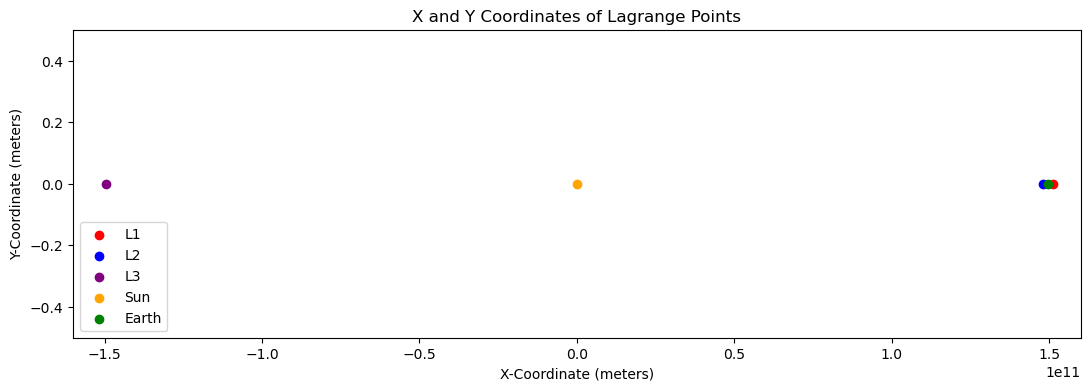

In [162]:
plt.figure(figsize=(13,4))
plt.xlim(-1.6e11, 1.6e11)
plt.ylim(-0.5, 0.5)
plt.scatter(l1[0], l1[1], c="red")
plt.scatter(l2[0], l2[1], c="blue")
plt.scatter(l3[0], l3[1], c="purple")
plt.scatter(rsun[0], rsun[1], c="orange")
plt.scatter(rearth[0], rearth[1], c="green")
plt.xlabel("X-Coordinate (meters)")
plt.ylabel("Y-Coordinate (meters)")
plt.title("X and Y Coordinates of Lagrange Points")
plt.legend(["L1", "L2", "L3", "Sun", "Earth"], loc = "lower left")
plt.show()